# AnomaData (Automated Anomaly Detection for Predictive Maintenance)

## Problem Statement:

Many different industries need predictive maintenance solutions to reduce risks and gain actionable insights through processing data from their equipment.

Although system failure is a very general issue that can occur in any machine, predicting the failure and taking steps to prevent such failure is most important for any machine or software application.

Predictive maintenance evaluates the condition of equipment by performing online monitoring. The goal is to perform maintenance before the equipment degrades or breaks down.

This Capstone project is aimed at predicting the machine breakdown by identifying the anomalies in the data.

The data we have contains about 18000+ rows collected over few days. The column ‘y’ contains the binary labels, with 1 denoting there is an anomaly. The rest of the columns are predictors.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


Here I am importing the following Python libraries:

pandas as pd: This library is commonly used for data manipulation and analysis.

numpy as np: numpy is a library for numerical computing in Python.

matplotlib.pyplot as plt: Matplotlib is a plotting library for Python.

seaborn as sns: Seaborn is a statistical data visualization library based on Matplotlib.

These libraries provide essential tools and functions for data analysis, numerical computation, and visualization in Python.

In [101]:
# It is recommended to read the data from the specific location '/content/sample_data/AnomaData.xlsx';
# please update the location accordingly for proper grammar.

data = pd.read_excel('/content/sample_data/AnomaData.xlsx')


# Data Preprocessing:  
Clean, preprocess, and prepare the data for modeling. This step may include handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.

In [92]:
# Display the first few rows of the dataset
data.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [93]:
# size of Data with numbers of Rows and columns

data.shape

(18398, 62)

In [94]:
# columns name

data.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1'],
      dtype='object')

In [95]:
# Length of columns

len(data.columns)

62

In [96]:
# Calculate the total number of missing values in each column

data.isnull().sum()

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

In [97]:
data.dtypes.unique()

array([dtype('<M8[ns]'), dtype('int64'), dtype('float64')], dtype=object)

In [98]:
data = data.drop('y.1', axis=1, inplace=True)


In [102]:
data.isnull().sum()

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

In [103]:
# Calculate the total number of rows in the DataFrame
total_rows = data.shape[0]

# Calculate the percentage of missing values for each column
percentage_missing = (data.isnull().sum() / total_rows) * 100

# Display the percentage of missing values for each column
print("Percentage of Missing Values:")
print(percentage_missing)

Percentage of Missing Values:
time    0.0
y       0.0
x1      0.0
x2      0.0
x3      0.0
       ... 
x57     0.0
x58     0.0
x59     0.0
x60     0.0
y.1     0.0
Length: 62, dtype: float64


In [104]:
# Summary statistics of numerical columns

data.describe()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,1999-05-15 01:20:42.728557312,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
min,1999-05-01 00:00:00,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,1999-05-08 03:36:30,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,1999-05-14 18:39:00,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,1999-05-22 06:01:30,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1999-05-29 00:06:00,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000
std,NaN,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120


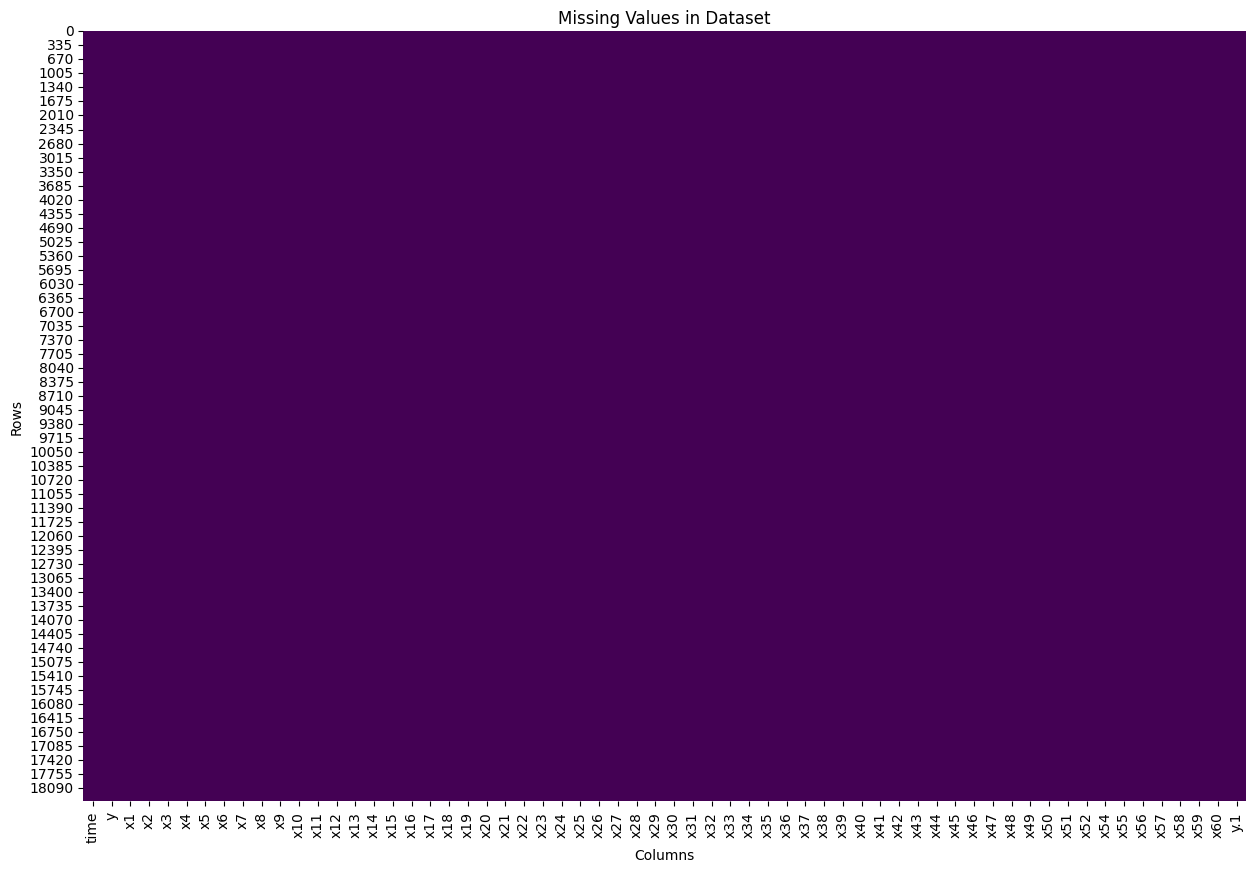

In [105]:
# Check for missing values in each column
missing_values = data.isnull()

# Create a heatmap of missing values
plt.figure(figsize=(15, 10))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


Since we are seeing only one color in the heatmap, it likely means that there are no missing values in your dataset. In the context of the heatmap:

One Color (e.g., all white or all blue): This indicates that there are no missing values present in your dataset.

Since the heatmap represents missing values using colors, if there are no missing values, there won't be any variation in color, resulting in a uniform color across the entire heatmap.



**Visual inspection**  is a crucial first step in identifying outliers within a dataset. Through various plots and visualizations, by this I can gain insights into the distribution, spread, and potential anomalies present in your data.

**Histograms:** Histograms provide a graphical representation of the distribution of numerical data. By observing the shape and spread of the histogram, you can identify potential outliers as data points that deviate significantly from the bulk of the data. Outliers may appear as isolated bars at the extreme ends of the distribution.

**Box Plots:** Box plots, also known as box-and-whisker plots, offer a concise summary of the distribution of numerical data. They display the median, quartiles, and potential outliers of the dataset. Outliers are represented as individual points beyond the whiskers of the box plot, making them visually distinct from the main distribution.

**Scatter Plots:** Scatter plots are particularly useful for identifying outliers in bivariate or multivariate data. By plotting one variable against another, you can visually inspect the relationship between variables and detect any data points that lie far away from the main cluster. Outliers in scatter plots appear as individual points that deviate significantly from the overall pattern or trend.

In [106]:
data.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [107]:
# Dropping the 'y.1' column from the DataFrame
data = data.drop(['y.1'], axis=1)

# Check the first few rows of the DataFrame to confirm the column is dropped
print(data.head())


                 time  y        x1        x2        x3         x4        x5  \
0 1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830   
1 1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733   
2 1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636   
3 1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612  13.161566 -0.148142   
4 1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150  15.267340 -0.155314   

          x6        x7        x8  ...        x50        x51        x52  \
0 -20.669883  0.000732 -0.061114  ...  11.295155  29.984624  10.091721   
1 -18.758079  0.000732 -0.061114  ...  11.290761  29.984624  10.095871   
2 -17.836632  0.010803 -0.061114  ...  11.286366  29.984624  10.100265   
3 -18.517601  0.002075 -0.061114  ...  11.281972  29.984624  10.104660   
4 -17.505913  0.000732 -0.061114  ...  11.277577  29.984624  10.109054   

        x54        x55        x56       x57       x58       x59       x60  
0 -4

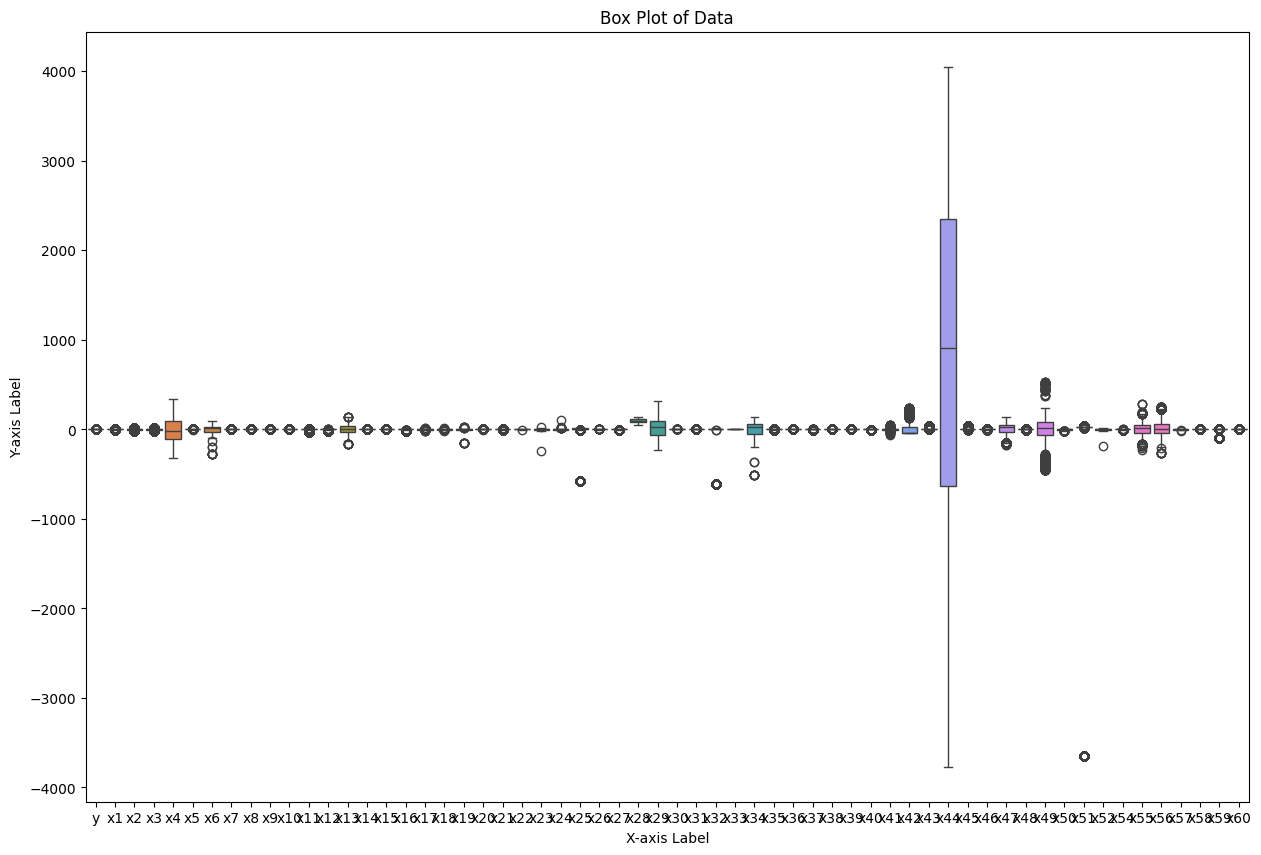

In [108]:
# Create a box plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title('Box Plot of Data')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

Seeing a **large box plot suggests significant variability in the plotted data**. The box plot visualizes data distribution, showing central tendency, spread, and potential outliers.

## Here's what the components of a **box plot** represent:

**Box:** The box represents the interquartile range (IQR), which is the range between the 25th and 75th percentiles (Q1 and Q3). The height of the box indicates the spread of the middle 50% of the data. A larger box suggests a wider spread of values within this range.

**Median (line inside the box):** The line inside the box represents the median value of the data. It indicates the central tendency of the distribution.

**Whiskers:** The whiskers extend from the top and bottom of the box to the minimum and maximum values within a certain range (often 1.5 times the IQR). Points beyond the whiskers are considered potential outliers.

**Outliers (individual points outside the whiskers):** Individual data points that fall outside the whiskers are considered potential outliers. They represent values that are significantly higher or lower than the rest of the data.

A large box plot suggests that the data has a wide range of values and may have substantial variability. This could be due to factors such as heterogeneity in the dataset, the presence of outliers, or natural variability in the underlying process being measured.

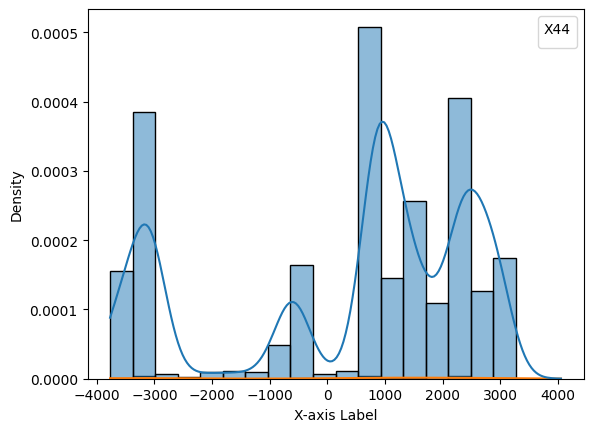

In [109]:
# Create a histogram

sns.histplot(data=data, x='x44', hue='y', bins=20, kde=True, stat='density', fill=True, alpha=0.5)
plt.xlabel('X-axis Label')
plt.ylabel('Density')
plt.legend(title='X44')
plt.show()

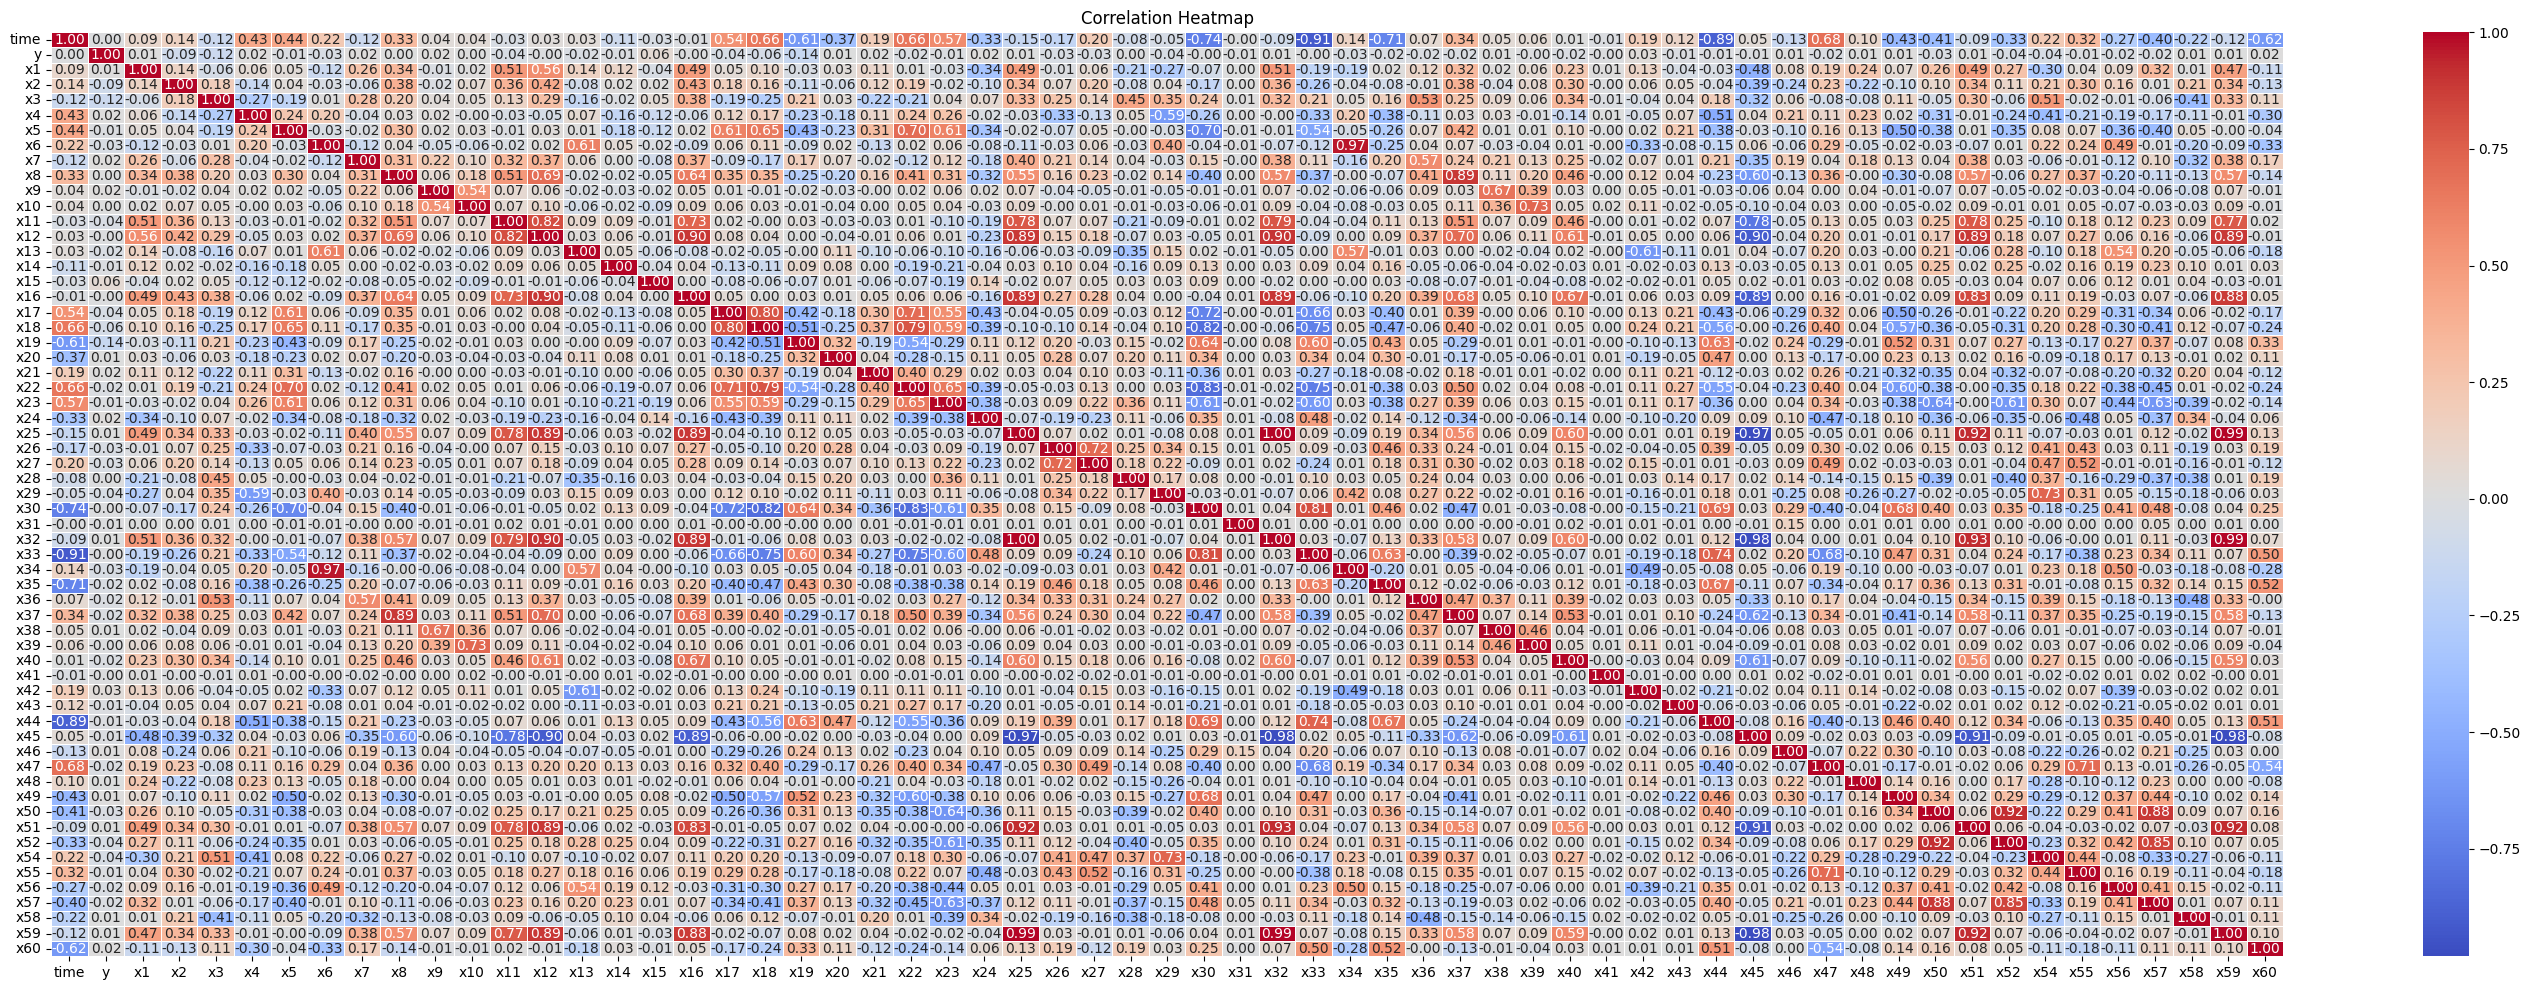

In [110]:
# Correlation Heatmap
plt.figure(figsize=(36, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [111]:
# Handling outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [112]:
# Apply remove_outliers function to each numeric column
numeric_columns = data.select_dtypes(include=['number']).columns
for col in numeric_columns:
    data = remove_outliers(data, col)

In [113]:
data

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
809,1999-05-02 05:32:00,0,-0.581214,-3.390954,3.297203,128.410132,0.021352,-2.817802,0.052928,-0.014526,...,-0.105480,29.984624,-0.949295,2.621830,-12.931332,-69.720938,-1.470630,0.018519,2.538279,0.007928
814,1999-05-02 05:42:00,0,-0.683737,-3.140092,3.710118,128.410162,0.119100,-4.533104,0.050782,-0.021135,...,-0.247081,29.984624,-1.090897,2.614077,-16.658505,-73.817160,0.452037,0.016828,2.543490,0.007893
916,1999-05-02 09:08:00,0,-0.721642,0.246852,5.382126,159.973914,-0.189448,17.343514,0.050782,-0.000993,...,-1.917980,29.984624,-2.757156,2.714456,-20.003354,-54.164359,-1.165393,0.015653,2.512766,0.007167
920,1999-05-02 09:16:00,0,-0.817066,-0.184258,5.671269,171.346625,-0.272852,24.940438,0.040711,-0.000993,...,-1.917980,29.984624,-2.757156,2.714103,-16.146298,-58.437872,-0.860218,0.014266,2.451929,0.007138
924,1999-05-02 09:24:00,0,-0.768051,-0.026263,5.693081,-322.781610,-0.296961,32.206276,-0.009338,-0.011064,...,-1.917980,29.984624,-2.757156,2.713750,-20.718075,-49.407050,-1.403491,0.013926,2.283060,0.007110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,1999-05-28 23:58:00,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,-1.917980,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242
18394,1999-05-29 00:00:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,-1.917980,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235
18395,1999-05-29 00:02:00,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,-1.917980,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228
18396,1999-05-29 00:04:00,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,-1.917980,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221


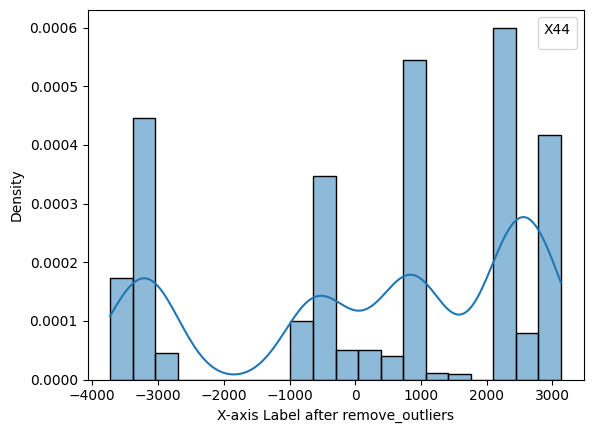

In [114]:
# Create a histogram

sns.histplot(data=data, x='x44', hue='y', bins=20, kde=True, stat='density', fill=True, alpha=0.5)
plt.xlabel('X-axis Label after remove_outliers')
plt.ylabel('Density')
plt.legend(title='X44')
plt.show()

We observe that the column values for x44 now exhibit a more bell curve shape, which will benefit the model.


## **Standardization** is a preprocessing technique used to scale the features of a dataset so that they have a mean of 0 and a standard deviation of .
 This process is particularly useful when the features in the dataset have different units or scales, as it ensures that each feature contributes equally to the analysis or model training.

In [115]:
# Standardization
def standardize(df):
    df_std = df.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std
data_scaled = standardize(data.drop('y', axis=1))

In [116]:
data_scaled


,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
809,-1.725737,-1.168794,-1.870937,0.907784,1.863923,-0.390178,-0.309426,1.039963,-0.448667,0.289641,...,0.103175,0.999787,-0.025388,0.934380,-1.204386,-1.066160,-0.325362,0.468370,3.691693,1.470248
814,-1.724913,-1.374962,-1.779728,1.011526,1.863924,-0.243974,-0.359123,1.010765,-0.568382,-0.503378,...,0.078772,0.999787,-0.053212,0.927444,-1.332812,-1.125553,0.572012,0.343216,3.702425,1.463443
916,-1.707940,-1.451187,-0.548294,1.431607,2.212919,-0.705477,0.274697,1.010765,-0.203533,-0.503378,...,-0.209196,0.999787,-0.380619,1.017246,-1.448065,-0.840594,-0.182898,0.256252,3.639152,1.322290
920,-1.707281,-1.643078,-0.705038,1.504252,2.338666,-0.830227,0.494798,0.873742,-0.203533,-0.503378,...,-0.209196,0.999787,-0.380619,1.016931,-1.315163,-0.902559,-0.040462,0.153598,3.513864,1.316652
924,-1.706622,-1.544513,-0.647594,1.509732,-3.124837,-0.866287,0.705307,0.192773,-0.385957,2.068322,...,-0.209196,0.999787,-0.380619,1.016615,-1.472692,-0.771615,-0.294026,0.128434,3.166095,1.311208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,1.450140,-1.764491,-0.352113,0.181496,1.940117,-0.254152,0.534199,-1.845997,0.879966,-1.078732,...,-0.209196,0.999787,0.009151,0.988580,-0.519524,-0.603254,-0.040462,-0.145853,0.308935,-2.256884
18394,1.450305,-1.697216,-0.407866,0.220562,1.917204,-0.210721,0.516184,-1.845997,0.879966,-1.078732,...,-0.209196,0.999787,0.009151,0.989407,-0.741318,-0.625896,-0.066356,-0.116249,-1.174527,-2.255523
18395,1.450470,-1.662146,-0.474388,0.163446,1.936543,-0.167288,0.498170,-1.845997,0.697541,-1.078732,...,-0.209196,0.999787,0.009151,0.990235,-0.662020,-0.625896,-0.296875,0.083805,-0.256710,-2.254162
18396,1.450634,-1.654695,-0.485565,0.176682,1.944072,-0.123834,0.480155,-1.845997,0.697541,-1.078732,...,-0.209196,0.999787,0.009151,0.991063,-0.684220,-0.625896,-0.040462,0.051610,1.328785,-2.252802


In [117]:
# Concatenate scaled features with target column
cleaned_data = pd.concat([data_scaled, data['y']], axis=1)
cleaned_data

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y
809,-1.725737,-1.168794,-1.870937,0.907784,1.863923,-0.390178,-0.309426,1.039963,-0.448667,0.289641,...,0.999787,-0.025388,0.934380,-1.204386,-1.066160,-0.325362,0.468370,3.691693,1.470248,0
814,-1.724913,-1.374962,-1.779728,1.011526,1.863924,-0.243974,-0.359123,1.010765,-0.568382,-0.503378,...,0.999787,-0.053212,0.927444,-1.332812,-1.125553,0.572012,0.343216,3.702425,1.463443,0
916,-1.707940,-1.451187,-0.548294,1.431607,2.212919,-0.705477,0.274697,1.010765,-0.203533,-0.503378,...,0.999787,-0.380619,1.017246,-1.448065,-0.840594,-0.182898,0.256252,3.639152,1.322290,0
920,-1.707281,-1.643078,-0.705038,1.504252,2.338666,-0.830227,0.494798,0.873742,-0.203533,-0.503378,...,0.999787,-0.380619,1.016931,-1.315163,-0.902559,-0.040462,0.153598,3.513864,1.316652,0
924,-1.706622,-1.544513,-0.647594,1.509732,-3.124837,-0.866287,0.705307,0.192773,-0.385957,2.068322,...,0.999787,-0.380619,1.016615,-1.472692,-0.771615,-0.294026,0.128434,3.166095,1.311208,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,1.450140,-1.764491,-0.352113,0.181496,1.940117,-0.254152,0.534199,-1.845997,0.879966,-1.078732,...,0.999787,0.009151,0.988580,-0.519524,-0.603254,-0.040462,-0.145853,0.308935,-2.256884,0
18394,1.450305,-1.697216,-0.407866,0.220562,1.917204,-0.210721,0.516184,-1.845997,0.879966,-1.078732,...,0.999787,0.009151,0.989407,-0.741318,-0.625896,-0.066356,-0.116249,-1.174527,-2.255523,0
18395,1.450470,-1.662146,-0.474388,0.163446,1.936543,-0.167288,0.498170,-1.845997,0.697541,-1.078732,...,0.999787,0.009151,0.990235,-0.662020,-0.625896,-0.296875,0.083805,-0.256710,-2.254162,0
18396,1.450634,-1.654695,-0.485565,0.176682,1.944072,-0.123834,0.480155,-1.845997,0.697541,-1.078732,...,0.999787,0.009151,0.991063,-0.684220,-0.625896,-0.040462,0.051610,1.328785,-2.252802,0


Here's what we accomplished:
1. Loading the dataset initially.
2. Handling missing values by dropping rows with missing data.
3. Addressing outliers through the IQR (Interquartile Range) method. This technique involves computing Q1, Q3, and IQR for each numeric column, then excluding rows outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].
4. Standardizing the data by mean subtraction and division by standard deviation for each feature. This standardization is done manually, not using StandardScaler.
5. Finally, merging the standardized features with the target column to create the refined dataset


In [118]:
data

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
809,1999-05-02 05:32:00,0,-0.581214,-3.390954,3.297203,128.410132,0.021352,-2.817802,0.052928,-0.014526,...,-0.105480,29.984624,-0.949295,2.621830,-12.931332,-69.720938,-1.470630,0.018519,2.538279,0.007928
814,1999-05-02 05:42:00,0,-0.683737,-3.140092,3.710118,128.410162,0.119100,-4.533104,0.050782,-0.021135,...,-0.247081,29.984624,-1.090897,2.614077,-16.658505,-73.817160,0.452037,0.016828,2.543490,0.007893
916,1999-05-02 09:08:00,0,-0.721642,0.246852,5.382126,159.973914,-0.189448,17.343514,0.050782,-0.000993,...,-1.917980,29.984624,-2.757156,2.714456,-20.003354,-54.164359,-1.165393,0.015653,2.512766,0.007167
920,1999-05-02 09:16:00,0,-0.817066,-0.184258,5.671269,171.346625,-0.272852,24.940438,0.040711,-0.000993,...,-1.917980,29.984624,-2.757156,2.714103,-16.146298,-58.437872,-0.860218,0.014266,2.451929,0.007138
924,1999-05-02 09:24:00,0,-0.768051,-0.026263,5.693081,-322.781610,-0.296961,32.206276,-0.009338,-0.011064,...,-1.917980,29.984624,-2.757156,2.713750,-20.718075,-49.407050,-1.403491,0.013926,2.283060,0.007110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,1999-05-28 23:58:00,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,-1.917980,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242
18394,1999-05-29 00:00:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,-1.917980,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235
18395,1999-05-29 00:02:00,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,-1.917980,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228
18396,1999-05-29 00:04:00,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,-1.917980,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221


In [119]:
data['y'].unique()

array([0])

This code snippet creates a **new feature named 'x_sum'** by adding up the values of columns 'x1' to 'x52'. Then, it generates a histogram to show how frequently different sums occur in the dataset. The histogram is plotted with blue bars, black edges for clarity, and slight transparency for better visualization. This allows easy understanding of the distribution pattern of the combined feature 'x_sum' across the dataset.

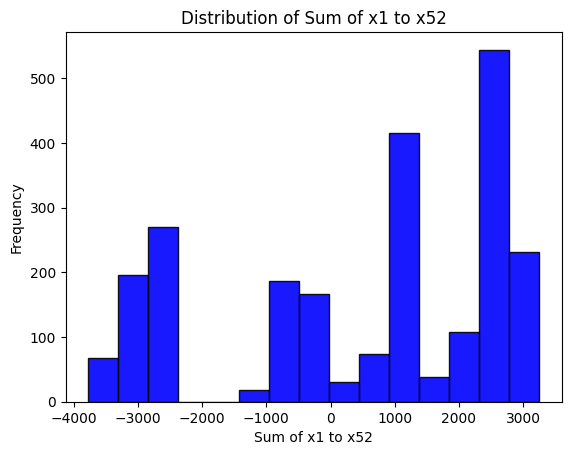

In [120]:
# Feature Engineering: Creating new features Sum of x1 to x52
data['x_sum'] = data.iloc[:, 2:53].sum(axis=1) # 0=1 , 52 = 52+1
data['x_sum'].head()

plt.hist(data['x_sum'], bins=15 , color='blue', edgecolor='black', alpha=0.9)
plt.xlabel('Sum of x1 to x52')
plt.ylabel('Frequency')
plt.title('Distribution of Sum of x1 to x52')
plt.show()

In [121]:
#First 5 sum values
data['x_sum'].head()

809    1532.072116
814    1548.910481
916    1637.098461
920    1686.723717
924    1216.348831
Name: x_sum, dtype: float64

This code identifies the row containing the highest 'sum' value within the 'data' DataFrame. First, it identifies the index associated with the 'sum' value considered to be the highest via the 'idxmax()' function, applying it against the 'x_sum' column. Second, it pulls the row using the 'loc' function into the variable 'highest_sum_row'. Finally, it prints the row containing the 'time' and 'sum_x' columns, indicating the time and sum value related to the highest sum in the dataset.

In [122]:
# Find the row with the highest sum value
highest_sum_row = data.loc[data['x_sum'].idxmax()]

# Find the index of the row with the highest sum value
highest_sum_index = data['x_sum'].idxmax()

# Extract the row with the highest sum value
highest_sum_row = data.loc[highest_sum_index, ['time', 'x_sum']]
print("highest sum value:")
highest_sum_row

highest sum value:


time     1999-05-08 08:40:00
x_sum            3250.742384
Name: 4751, dtype: object

In [123]:
# Mean of x1 to x52
data['x_mean'] = data.iloc[:, 2:53].mean(axis=1)
data['x_mean'].head()

809    30.040630
814    30.370794
916    32.099970
920    33.073014
924    23.849977
Name: x_mean, dtype: float64

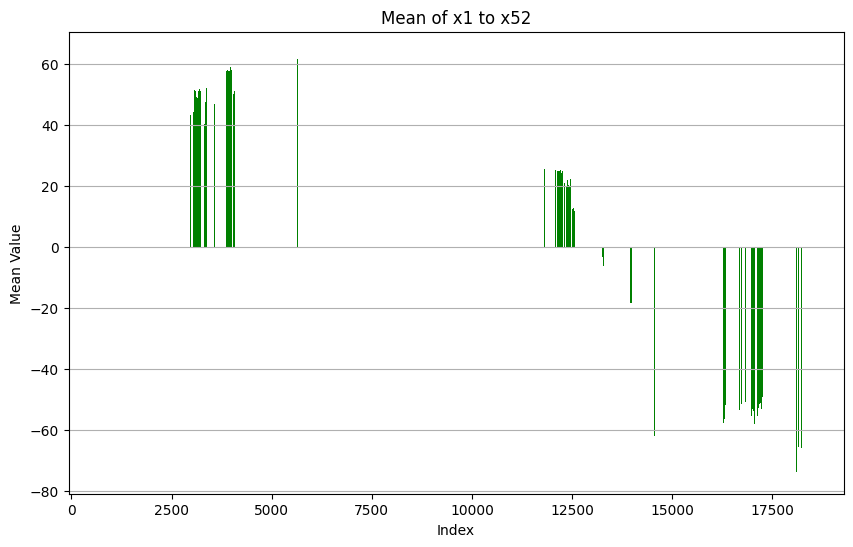

In [124]:
#ploting the [x_mean]

plt.figure(figsize=(10, 6))
plt.bar(data.index, data['x_mean'], color='green')
plt.title('Mean of x1 to x52')
plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.grid(axis='y')
plt.show()

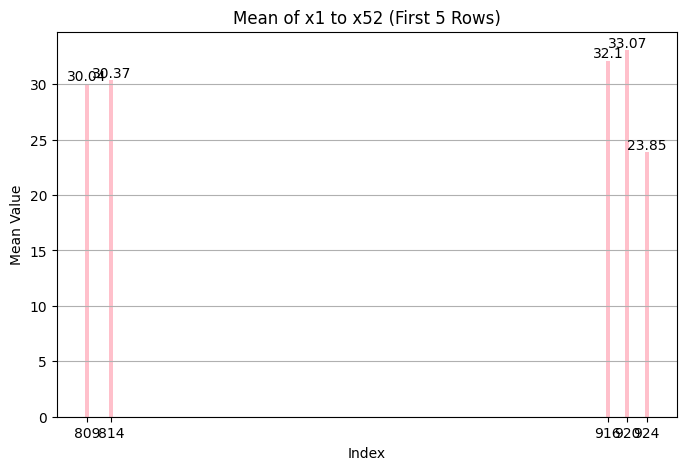

In [125]:
#ploting the first 5 [mean_x]
data_subset = data.head(5)

# Create a bar chart for mean_x data of the first 5 rows
plt.figure(figsize=(8, 5))  # Set the figure size
bars = plt.bar(data_subset.index, data_subset['x_mean'], color='pink')

# Add value annotations on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.title('Mean of x1 to x52 (First 5 Rows)')
plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.grid(axis='y')
plt.xticks(data_subset.index)
plt.show()

In [126]:
# Max value of x1 to x52
data['x_max'] = data.iloc[:, 2:53].max(axis=1)
data['x_max'].head()

809    1425.42387
814    1432.50004
916    1374.41215
920    1350.91215
924    1339.14067
Name: x_max, dtype: float64

In [127]:
# Example 2: Feature transformation
 # Square of x1
data['x1_squared'] = data['x1']**2
data['x1_squared'].head()

809    0.337810
814    0.467497
916    0.520768
920    0.667596
924    0.589903
Name: x1_squared, dtype: float64

This code snippet adds two new features to the DataFrame 'data' based on the 'time' column, assuming it's in datetime format. One feature, 'hour', extracts the hour component from the 'time' column using the 'dt.hour' accessor and assigns it a column named 'hour'. The second feature, 'date', takes the date component from the 'time' column using the 'dt.date' accessor and puts it into a column named 'date'. This allows further analysis and visualization that is based on hourly or daily trends within the set.

**Model Selection, Training, and Assessment**
Choosing the right model, training it, and evaluating its performance are key steps. We will use RandomForestClassifier, split the data into training and test sets, and assess the model using accuracy, confusion matrix, and classification report.

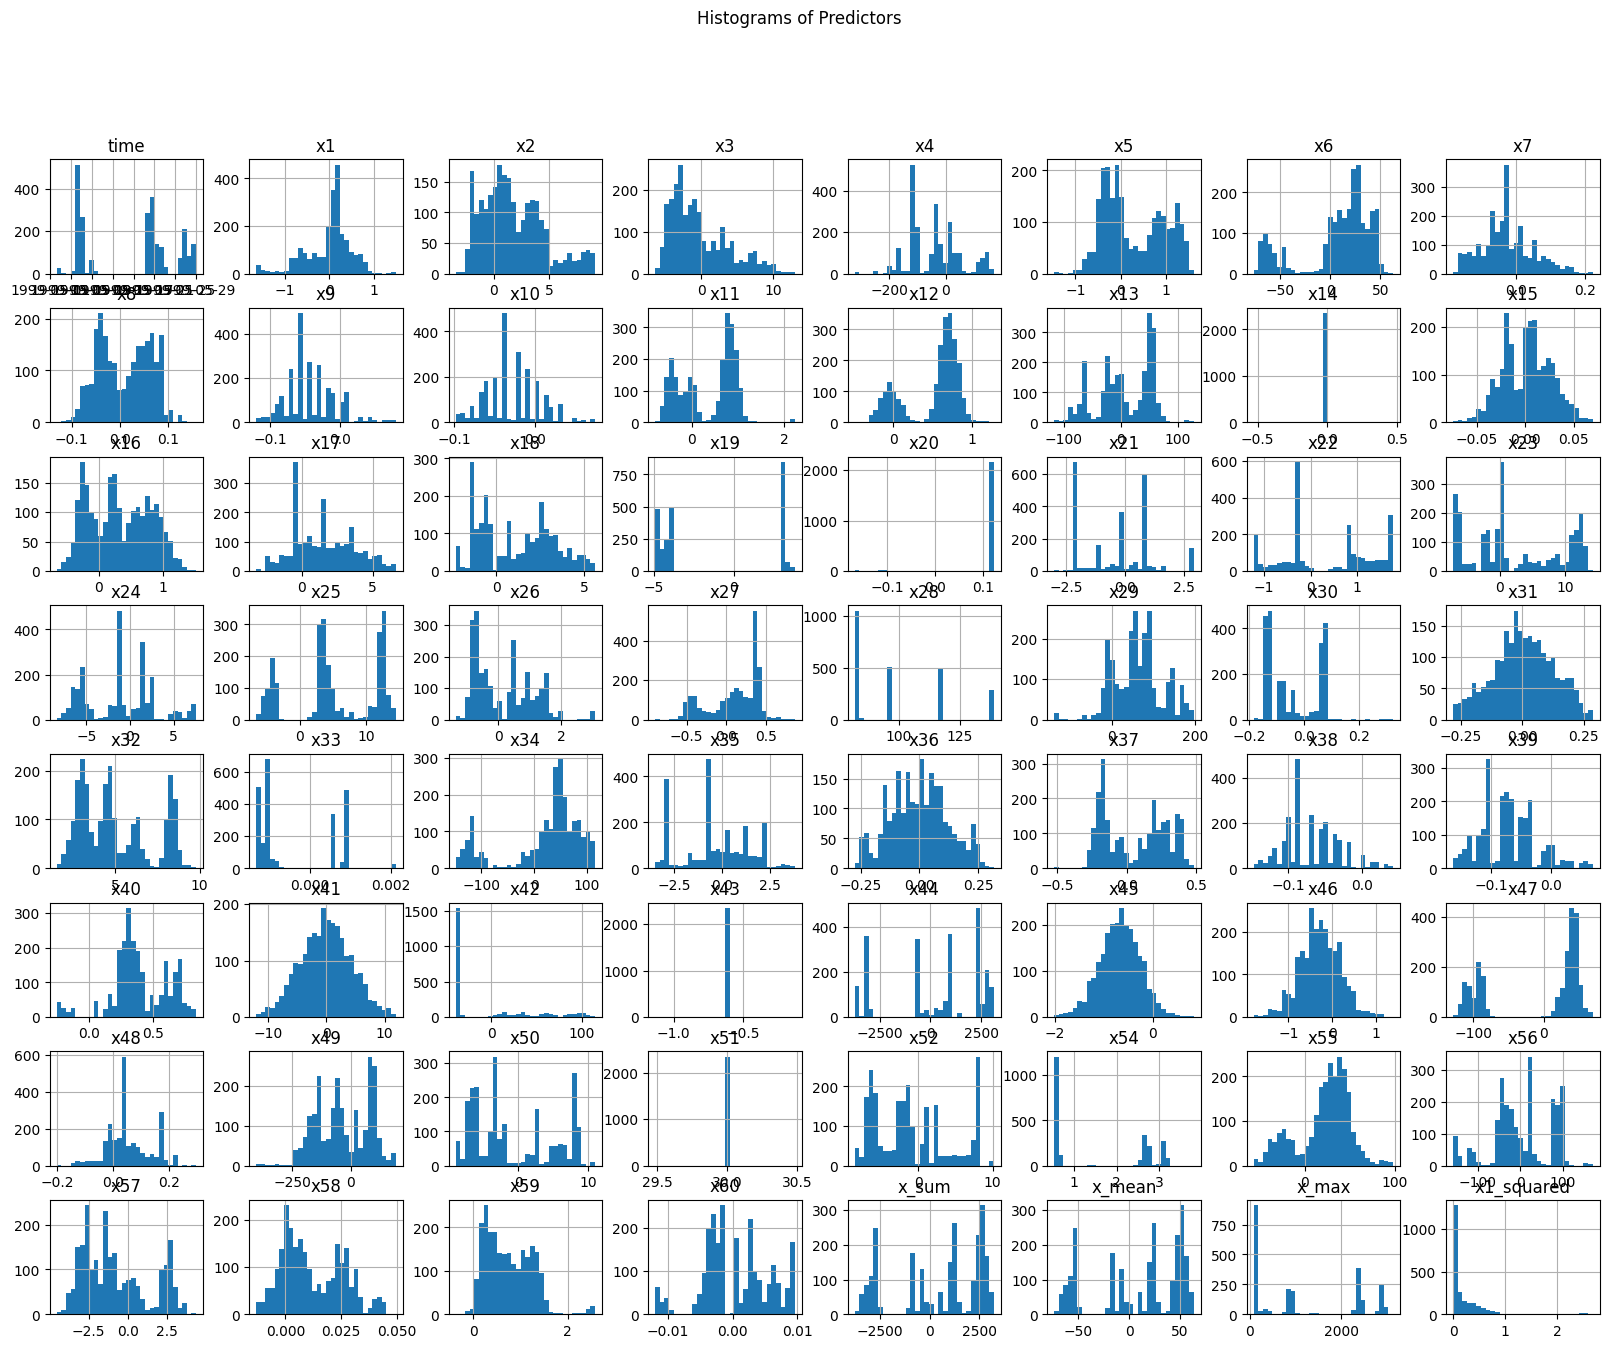

In [128]:
# Histograms of Predictors
data.drop('y', axis=1).hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Predictors')
plt.show()


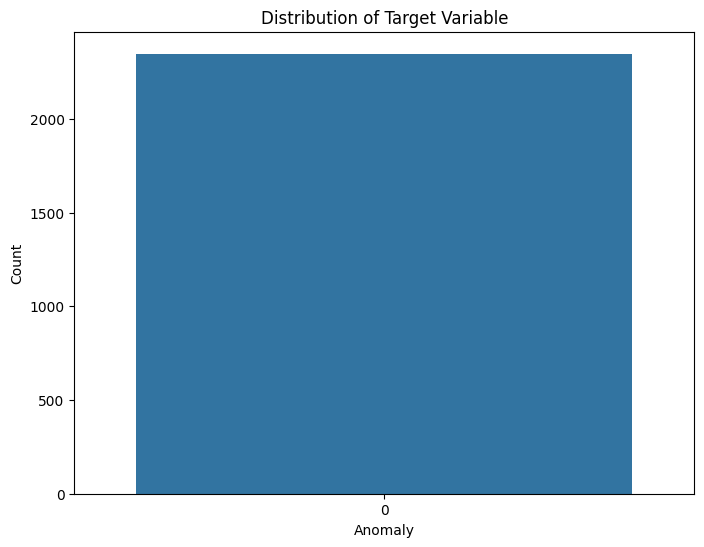

In [129]:
# Distribution of the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [131]:
#1st I load the data again
data = pd.read_excel('/content/sample_data/AnomaData.xlsx')

This code snippet imports several modules and functions from the scikit-learn  to create and evaluate machine learning models:

1. `train_test_split`: This function is used for splitting the dataset into training and test sets, which is necessary for model evaluation.

2. `LogisticRegression`: This class represents logistic regression, which is one of the most widely used methods in binary classification.

3. `RandomForestClassifier`: This class represents a random forest classifier, which is an ensemble learning method based on decision trees and is applicable to both classification and regression problems.

4. `accuracy_score`: This function computes the accuracy of a classification model, which is the ratio of correctly predicted observations to the total number of observations.

5. `precision_score`: This function computes the precision of a classification model, which is the ratio of true positive predictions to the total number of positive predictions.

6. `recall_score`: This function computes the recall of a classification model, which is the ratio of true positive predictions to the total number of actual positive instances.

7. `f1_score`: This function computes the F1 score, which is the harmonic mean of precision and recall and, hence, is a balanced measure of model performance.

8. `roc_auc_score`: This function computes the Receiver Operating Characteristic (ROC) Area Under the Curve (AUC) score, which is a metric to judge the performance of a binary classification model regarding its ability to discriminate between positive and negative instances.

These functions and models are quite common in machine learning applications.

**Features (X):** The columns 'time' (assuming it is not any feature for prediction) and 'y' (target variable) from the dataset are dropped using the drop method with the axis=1 parameter, which shows dropping columns. This will result in a DataFrame 'X' that holds all the features used in the prediction.

**Target variable (y):** The target variable 'y' is fetched from the dataset and assigned to a separate variable. Herein, it is assumed that there is a column named 'y' holding the target variable for prediction.

In [132]:
# Split the data into features (X) and target variable (y)
X = data.drop(['time', 'y'], axis=1)  # Let 'time' is not a feature for prediction
y = data['y']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**X_train and y_train:** These are the variables storing the features for the training set and the respective target values, respectively. They are returned after splitting the dataset 'X' and 'y' with train_test_split, while the 80% division of the data is for training.

**X_test and y_test:** Like the X_train and y_train, these are the variables storing the test features and respective target values, respectively. They contain the remaining 20% of the data, used in testing the performance of the model so trained.

In [134]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [135]:
# Define and train the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [136]:
y_pred = logistic_regression.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [137]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [138]:
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9959
Precision: 0.7333
Recall: 0.5000
F1 Score: 0.5946
ROC AUC Score: 0.7495


In [139]:
# Makeing predictions on the test set
y_test_pred = logistic_regression.predict(X_test_scaled)

In [140]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [141]:

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9959
Precision: 0.7333
Recall: 0.5000
F1 Score: 0.5946
ROC AUC Score: 0.7495


In [142]:
# Makeing predictions on the test set
y_test_pred = logistic_regression.predict(X_test_scaled)

In [143]:
# Evaluateing the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"ROC AUC Score: {roc_auc_test:.4f}")


Test Metrics:
Accuracy: 0.9959
Precision: 0.7333
Recall: 0.5000
F1 Score: 0.5946
ROC AUC Score: 0.7495


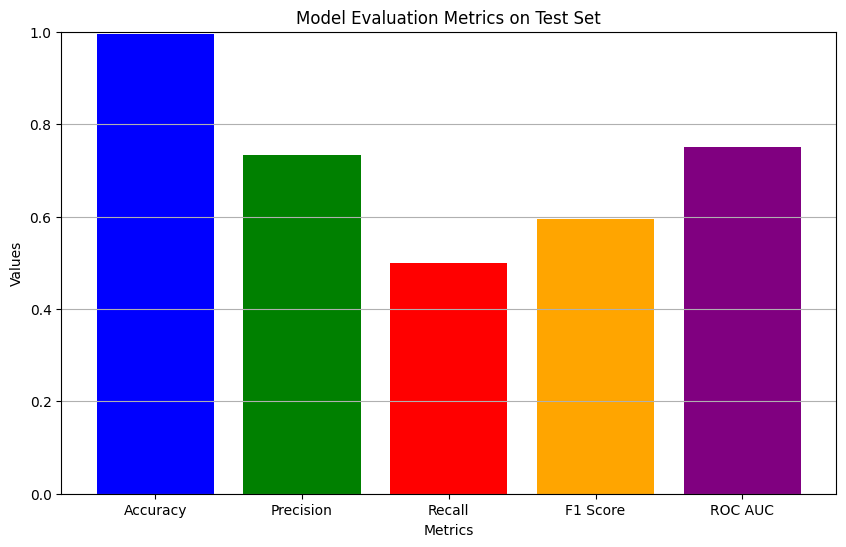

In [144]:

# Define evaluation metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
values = [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.title('Model Evaluation Metrics on Test Set')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1
plt.grid(axis='y')
plt.show()


In [145]:
from flask import Flask, request, jsonify
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle

## **Cross-Validation**
The model performance will be further validated through cross-validation.

## Cross-Validation:
Using the function cross_val_score, we do 5-fold cross-validation over the training data. This is highly recommended as a way of ensuring the model generalizes to unseen data.
Scores: We print out the individual cross-validation scores and their mean for an overall assessment of model performance.
Hyperparameter Tuning and Model Improvement
This is the process of adjusting parameters of a model for better performance.

## Hyperparameter Tuning:
 I perform a grid search, GridSearchCV, over the hyperparameters of the RandomForestClassifier. The parameters we tune are n_estimators, the number of trees in the forest; max_depth, the maximum depth of trees; min_samples_split, the minimum number of samples required to be at an internal node; and min_samples_leaf, the minimum number of samples required to be at a leaf node.
Best Model Selection: We select the best model from the grid search and proceed to its evaluation.
Final Model Evaluation
The best model found from hyperparameter tuning is evaluated.

## Prediction and Accuracy:
I use the best model for predicting over the test data. We then use the accuracy score to compute the accuracy of the predictions.
Confusion Matrix and Classification Report: We further proceed to evaluate the best model's performance through its confusion matrix and classification report.
Model Deployment Plan
Steps are provided on how to deploy the trained model into a production environment.

## Model Serialization:
I serialize the best model and the scaler used for feature scaling to disk for loadability in the future. Without retraining the model, it can then be used.
Deployment Steps: We provide a series of steps for deployment. These include creating a script or API endpoint to load the model and scaler, implementing functions to preprocess new input data and make predictions, and deploying the script/API to a server or cloud environment.

In [146]:
if data is not None:
    # Model Selection, Training, and Assessment
    print("Model Selection, Training, and Assessment:")
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predicting
    y_pred = model.predict(X_test_scaled)

    # Assessment
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Cross-Validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Accuracy:", np.mean(cv_scores))

    # Hyperparameter Tuning and Model Improvement
    print("Hyperparameter Tuning and Model Improvement:")
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_scaled, y_train)

    print("Best Parameters:", grid_search.best_params_)
    best_model = grid_search.best_estimator_

    # Final Model Evaluation
    y_pred_best = best_model.predict(X_test_scaled)
    best_accuracy = accuracy_score(y_test, y_pred_best)
    print("Best Model Accuracy:", best_accuracy)
    best_conf_matrix = confusion_matrix(y_test, y_pred_best)
    print("Best Model Confusion Matrix:\n", best_conf_matrix)
    print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

    # Model Deployment Plan
    print("Model Deployment Plan:")
    # Save the model and scaler to disk
    joblib.dump(best_model, 'best_model.joblib')
    joblib.dump(scaler, 'scaler.joblib')

    print("Model and Scaler saved to disk.")

    # Steps for deploying the model:
    print("""
    1. Save the trained model and scaler (already done above).
    2. Create a script or API endpoint to load the model and scaler.
    3. Implement a function to preprocess new input data using the saved scaler.
    4. Implement a function to make predictions using the loaded model.
    5. Deploy the script/API to a server or cloud environment.
    6. Integrate the deployed model with the rest of the application (if applicable).
    """)
else:
    print("Error: Unable to load the dataset.")

Model Selection, Training, and Assessment:
Accuracy: 0.997554347826087
Confusion Matrix:
 [[3657    1]
 [   8   14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3658
           1       0.93      0.64      0.76        22

    accuracy                           1.00      3680
   macro avg       0.97      0.82      0.88      3680
weighted avg       1.00      1.00      1.00      3680

Cross-Validation Scores: [0.99490489 0.99660326 0.99490489 0.99592253 0.99728169]
Mean CV Accuracy: 0.9959234513731922
Hyperparameter Tuning and Model Improvement:
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Accuracy: 0.997554347826087
Best Model Confusion Matrix:
 [[3657    1]
 [   8   14]]
Best Model Classification Report:
               precision    recall  f1-score   support

           0     